In [2]:
%run modules.ipynb
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
Nr = 6
preference_list = list(itertools.permutations(range(Nr), Nr))

In [3]:
# PLOTTING SETTINGS

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15
WIDTH = 500 # could modify later

from matplotlib import gridspec
#from brokenaxes import brokenaxes
import os

plt.rc('font', size=15, family='sans-serif', serif='Arial') # controls default text sizes
plt.rc('lines', linewidth=2) # make lines thicker
plt.rc('axes', linewidth=1)
plt.rc('xtick', labelsize = 15)

def set_size(width, scale=1, fraction = 1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * scale

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio / fraction

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
# LOAD THE DATA
Size = 20
import os
allInputs = []
allOutputs = []
for Nr in [2, 3, 4, 5, 6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 101):
        outputFileName = 'nutrient preference data\SpeciesPoolSizeFixed_Nr=2,3,4,5,6_2020_8_1\outputs_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        inputFileName = 'nutrient preference data\SpeciesPoolSizeFixed_Nr=2,3,4,5,6_2020_8_1\input_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([2, 3, 4, 5, 6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(2+Nr)*Size)
                n_reentrance[-1] += 1

<ipython-input-26-bf2a8148adb9>:145: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig2-1.pdf')
<ipython-input-26-bf2a8148adb9>:145: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig2-1.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.c

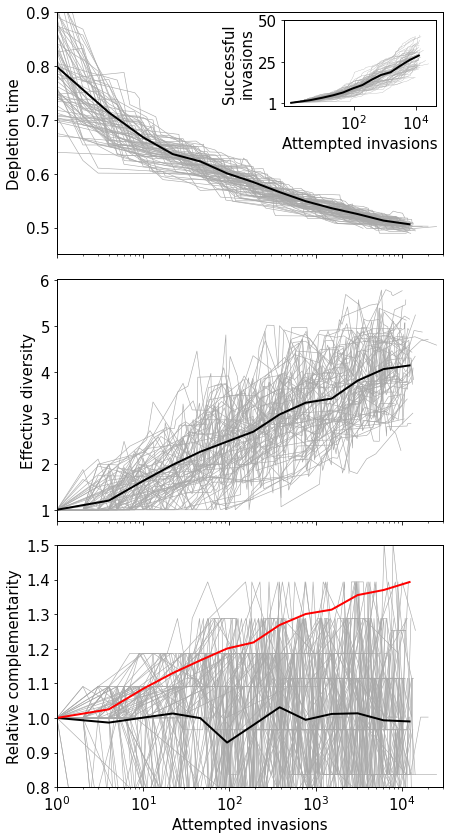

In [26]:
def slotsEvaluation(slotcuts, axis, xs, func, spaghettis = True, errorbar = True, align = 'center', **kwargs_of_func): # given the data and the slots, return the spaghetti plot and the errorbar plot created by x-slots.
    global kwargs_of_spaghetti
    global kwargs_of_errorbar
    # generate the ycoordinates and do the spaghetti plots
    plt.sca(axis)
    ys = [func(xcoords_idx, xcoords, **kwargs_of_func) for xcoords_idx, xcoords in enumerate(xs)]
#     for idx, i in enumerate(ys):
#         if(i[0]> 1):
#             print('haha')
#             print(ys[idx], xs[idx])
    # the function "func" takes in a list of xcoords and other info and returns a list of ycoords. 
    if spaghettis == True:
        for idx in range(len(xs)):
            plt.plot(xs[idx], ys[idx], **kwargs_of_spaghetti)
    # get the stats and do a average +- SEM
    ycoordInSlots = []
    for slotidx, slotbegin in enumerate(slotcuts[:-1]):
        ycoordInSlots.append([])
        slotend = slotcuts[slotidx + 1]
        for xcoords_idx, xcoords in enumerate(xs):
            for idx, i in enumerate(xcoords):
                if(slotbegin <= i < slotend):
                    ycoordInSlots[-1].append(ys[xcoords_idx][idx])
    thickMeans = [np.mean(i) for i in ycoordInSlots]
    thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
    if(align == 'center'):
        if errorbar == True:
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'leftedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'rightedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    return ys

fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.3))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=0.1) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0])

# first create the global slots for all the time series data
d = 2
gap = 1
summed = 0
slots = []
thrs = []
while(summed < max([i[-2] for i in invasionOrdersTime[-1]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = [0] + thrs[:-1]
#thrs.append(max([i[-2] for i in invasionOrdersTime[-1]])) 
xs = []
for outputidx, output6 in enumerate(allOutputs[-1]):
    xs.append([i + 1 for i in invasionOrdersTime[-1][outputidx][:-1]])

# the efficiencies
def efficiencies(xcoords_idx, xcoords, outputsDataset):
    detailsData = outputsDataset[xcoords_idx]['details']
    return [sum(i) for i in detailsData[3]][:-1]
    
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax1, xs, efficiencies, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1])
ax1.set_ylabel("Depletion time", fontsize = 15) 
ax1.set_xscale('log')
ax1.set_ylim([0.45, 0.9])
ax1.set_xlim([1, 3e4])
ax1.set_xticklabels([])

# the attempted vs. successful invasions
def successfulInvasions(xcoords_idx, xcoords, outputTimeDataset):
    return range(1, 1+len(outputTimeDataset[xcoords_idx]))[:-1]

axins1 = inset_axes(ax1, width=2.1, height=1.2)
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.3}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, axins1, xs, successfulInvasions, spaghettis = True, errorbar = False, outputTimeDataset = invasionOrdersTime[-1])
axins1.set_xscale('log')
axins1.set_xticks([1e2, 1e4])
axins1.set_yticks([1, 25, 50])
axins1.tick_params(axis='both', which='major', labelsize=15)
axins1.set_xlabel('Attempted invasions', fontsize = 15)
axins1.set_ylabel('Successful\ninvasions', fontsize = 15)

# the diversities
def diversities(xcoords_idx, xcoords, outputsDataset, Measure):
    data = outputsDataset[xcoords_idx]['details'][-2]
    return [Measure(snapshot[-1]) for snapshot in data][:-1]

# this is the diversity measured in inverse simpsons index
def simpsonEvenness(L):
    normalizedL  = [i/sum(L) for i in L]
    return 1/(sum([i**2 for i in normalizedL]))
# this is the diversity measured in number of species
def Nspecies(L):
    return len(L)

kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax2, xs, diversities, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1], Measure = simpsonEvenness)
ax2.set_xscale('log')
ax2.set_xticklabels('')
ax2.set_ylabel('Effective diversity', fontsize = 15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlim([1, 3e4])

# the complementarity
def upgradedUnikTopChoices(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return (len(set(L)) / len(L)) / randomE

def Nullcompl(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return 1 / randomE

def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // 20][consumeOrder] for j in i], Nnuts) for i in data[1][-len(xcoords)-1:-1]]

kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax3, xs, compls, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1],consumeOrder = 1, 
                complMeasure = upgradedUnikTopChoices, Nnuts = 6)
kwargs_of_errorbar = {'color': 'r'}
slotsEvaluation(thrs, ax3, xs, compls, spaghettis = False, errorbar = False, outputsDataset = allOutputs[-1],consumeOrder = 1, 
                complMeasure = Nullcompl, Nnuts = 6)
ax3.set_xlabel('Attempted invasions', fontsize = 15)
ax3.set_ylabel('Relative complementarity', fontsize = 15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xscale('log')
ax3.set_xlim([1, 3e4])
ax3.set_ylim([0.8, 1.5])

plt.savefig('figsversion1/fig2-1.pdf')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-27-f3a87bb57639>:59: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec witho

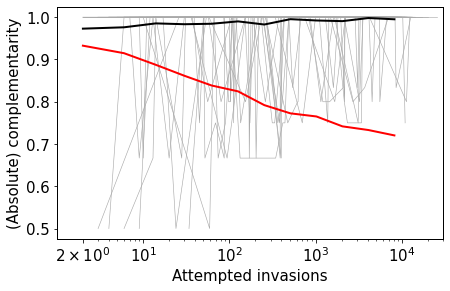

In [27]:
xsCompl = []
for outputidx, output6 in enumerate(allOutputs[-1]):
    start = 0
    for idx, i in enumerate(allOutputs[-1][outputidx]['details'][1]):
        if(len(i) == 2):
            start = idx
            xsCompl.append([i for i in invasionOrdersTime[-1][outputidx][start:-1]])
            break
    if(start == 0): xsCompl.append([])
        
def upgradedUnikTopChoicesRaw(L, N):
    return (len(set(L)) / len(L))

def NullCompl(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return randomE

ys = []  
order = 0
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[-1][idx].index(x[0])
        y = allOutputs[-1][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ys.append([upgradedUnikTopChoicesRaw(i, 6) for i in y])
        #plt.plot(x, y, color= '#A9A9A9', linewidth= 0.6) 
        
ysRnd = []  
order = 0
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[-1][idx].index(x[0])
        y = allOutputs[-1][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ysRnd.append([NullCompl(i, 6) for i in y])
        #plt.plot(x, y, color= '#A9A9A9', linewidth= 0.6) 
        
def Partcompl(xcoords_idx, xcoords):
    return ys[xcoords_idx]

def PartcomplRnd(xcoords_idx, xcoords):
    return ysRnd[xcoords_idx]
        
xsCompl = [[i+1 for i in j] for j in xsCompl]
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0]) 
kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax, xsCompl, Partcompl, align = 'leftedge', spaghettis = True, errorbar = False)
kwargs_of_errorbar = {'color': 'r'}
slotsEvaluation(thrs, ax, xsCompl, PartcomplRnd, align = 'leftedge', spaghettis = False, errorbar = False)
ax.set_xscale('log')
ax.set_xlim(1, 3e4)
ax.set_xticks([2, 10, 100, 1000, 10000])
ax.set_xticklabels(['$2\\times 10^0$', '$10^1$','$10^2$','$10^3$','$10^4$'])
ax.set_xlabel('Attempted invasions')
ax.set_ylabel('(Absolute) complementarity')
plt.savefig('figsversion1/absoluteC.pdf')

### some final complementarity plots

In [116]:
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
omniCompl = [sum([compls(xcoords_idx, [], allOutputs[-1], consumeOrder = i, complMeasure = upgradedUnikTopChoicesRaw, Nnuts = 6) for xcoords_idx in range(len(allOutputs[-1]))], []) for i in range(6)]
sns.violinplot(x = sum([[i+1 for j in omniCompl[i]] for i in range(len(omniCompl))], []), y = sum(omniCompl, []), color = '#808080')
plt.axhline(1, linestyle = '-.', color = 'k')
plt.xlabel('Preference order')
plt.ylabel('Relative complementarity')
plt.savefig('figsversion1/fig2-2.pdf')

IndexError: list index out of range

<Figure size 498.132x307.863 with 0 Axes>

In [114]:
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // 20][consumeOrder] for j in i], Nnuts) for i in data[1][:-1]]
omniCompl = [sum([compls(xcoords_idx, [], allOutputs[-1], consumeOrder = i, complMeasure = upgradedUnikTopChoices, Nnuts = 6) for xcoords_idx in range(len(allOutputs[-1]))], []) for i in range(6)]
ymeans = [np.mean(i) for i in omniCompl]
yerrors = [np.std(i)/sqrt(len(i)) for i in omniCompl]
plt.errorbar(range(1, 7), ymeans, yerr = yerrors, marker = 'o', markersize = 10,mfc = 'none', color = 'k')
plt.axhline(1, linestyle = '-.', color = 'k')
plt.xlabel('Preference order')
plt.ylabel('Relative complementarity')
#plt.savefig('figsversion1/fig2-2.pdf')
plt.show()
plt.bar(range(1, 7), ymeans, yerr=yerrors, alpha=0.5, ecolor='k', capsize=5)
plt.ylim(0.8, 1.3)
plt.axhline(1, linestyle = '-.', color = 'k')
plt.xlabel('Preference order')
plt.ylabel('Relative complementarity')
plt.savefig('figsversion1/finalCompls.pdf')

IndexError: list index out of range

<Figure size 498.132x307.863 with 0 Axes>

### Comparing some complementarity measures

(1, 30000.0)

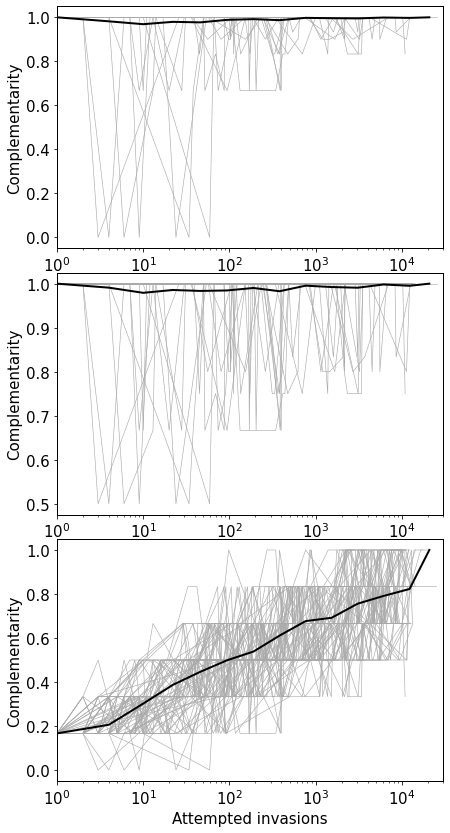

In [32]:
# define a family of complementarities
def uniqueTopChoices(L, N):
    return len(set(L))/len(L)

def avoidConflicts(L, N):
    compl = 0
    for bug in L:
        conflict = L.count(bug) - 1
        if(len(L) == 1):
            return 1
        conflFrac = conflict / (len(L) - 1)
        compl += 1 - conflFrac
    compl /= len(L)
    return compl

def avoidInvasion(L, N):
    data = [L.count(i) for i in set(L)]
    return 1 - (sum([abs(i-1) for i in data]) + (N - len(data))) / N

# first create the global slots for all the time series data
d = 2
gap = 1
summed = 0
slots = []
thrs = []
while(summed < max([i[-2] for i in invasionOrdersTime[-1]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = [0] + thrs[:-1]
thrs.append(max([i[-2] for i in invasionOrdersTime[-1]])) 
xs = []
for outputidx, output6 in enumerate(allOutputs[-1]):
    xs.append([i + 1 for i in invasionOrdersTime[-1][outputidx][:-1]])
    
# the complementarity
def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // 20][consumeOrder] for j in i], Nnuts) for i in data[1][:-1]]

kwargs_of_spaghetti = {'color': '#A9A9A9', 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}

fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.3))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=0.1) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0]) 

slotsEvaluation(thrs, ax1, xs, compls, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1],consumeOrder = 0, 
                complMeasure = avoidConflicts, Nnuts = 6)
ax1.set_ylabel('Complementarity', fontsize = 15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xscale('log')
ax1.set_xlim([1, 3e4])

slotsEvaluation(thrs, ax2, xs, compls, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1],consumeOrder = 0, 
                complMeasure = uniqueTopChoices, Nnuts = 6)
ax2.set_ylabel('Complementarity', fontsize = 15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xscale('log')
ax2.set_xlim([1, 3e4])

slotsEvaluation(thrs, ax3, xs, compls, spaghettis = True, errorbar = False, outputsDataset = allOutputs[-1],consumeOrder = 0, 
                complMeasure = avoidInvasion, Nnuts = 6)
ax3.set_xlabel('Attempted invasions', fontsize = 15)
ax3.set_ylabel('Complementarity', fontsize = 15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xscale('log')
ax3.set_xlim([1, 3e4])

### Perishing anomaly

[[14356], [489, 14356], [7167, 14356], [5575, 14356], [149, 5575], [149, 10646], [149, 7850, 10646], [149, 7850, 10646, 14139], [149, 7850, 8103, 10646, 14139], [149, 4754, 7850, 10646, 14139], [149, 4754, 6897, 7850, 10646, 14139], [149, 4754, 7850, 13077], [149, 4754, 7850, 9664, 13077], [149, 4754, 7850, 9614, 13077], [149, 4754, 11209, 13077], [149, 4754, 11209, 13824]]


<ipython-input-6-1ab75dfb726b>:77: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig2-3.pdf')
<ipython-input-6-1ab75dfb726b>:77: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig2-3.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canva

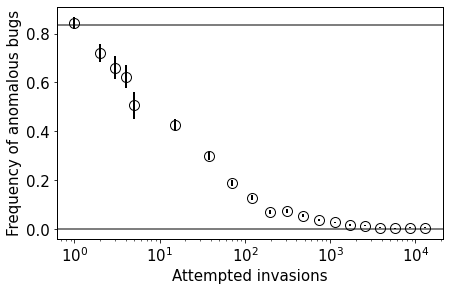

In [6]:
# set the canvas
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
gs = gridspec.GridSpec(1, 1)
gs.update(hspace=0.1)
ax = fig.add_subplot(gs[0, 0]) 

#import the dataset
Size = 20
import os
allInputs = []
allOutputs = []
for Nr in [6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 401):
        outputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\outputs_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        inputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\input_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(2+Nr)*Size)
                n_reentrance[-1] += 1       
                
# set the logscale gap
d = 1.5
gap = 10
summed = 0
slots = []
thrs = [1, 2, 3, 4, 5]
while(summed < max([i[-2] for i in invasionOrdersTime[-1]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = thrs[:-1]
#thrs.append(max([i[-2] for i in invasionOrdersTime[-1]]))
thrs = [0] +thrs

print(allOutputs[-1][0]['details'][1][:-1])

xs = []
for outputidx, output6 in enumerate(allOutputs[-1]):
    xs.append(invasionOrdersTime[-1][outputidx][:-1])
    
def fracAnomaly(xcoords_idx, xcoords, outputsDataset, inputsDataset):
    survivors = outputsDataset[xcoords_idx]['details'][1][:-1]
    #survivorSnapshot = survivors[-7]
    return [sum([isFreak(inputsDataset[xcoords_idx]['G'], bug) for bug in survivorSnapshot]) / len(survivorSnapshot) for survivorSnapshot in survivors]

kwargs_of_errorbar = {'marker': 'o', 'markersize': 10, 'ls': 'none', 'mfc': 'none', 'color': 'k'}
slotsEvaluation(thrs, ax, xs, fracAnomaly, spaghettis = False, errorbar = True, align = 'rightedge', outputsDataset = allOutputs[-1], inputsDataset = allInputs[-1])
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Attempted invasions')
ax.set_ylabel('Frequency of anomalous bugs')
ax.axhline(5/6, color = 'k', alpha = .5)
ax.axhline(0, color = 'k', alpha = .5)
plt.savefig('figsversion1/fig2-3.pdf')

# ax3.set_xlabel('Attempted invasions', fontsize = 15)
# ax3.set_ylabel('Complementarity', fontsize = 15)
# ax3.tick_params(axis='both', which='major', labelsize=15)
# ax3.set_xscale('log')
# ax3.set_xlim([1, 3e4])

### Try something with 4 nutrients.

[0, 2, 10, 30, 70, 150, 310, 630, 1270, 2550, 5110, 10230, 14400]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-30-bd668a13cde7>:238: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec with

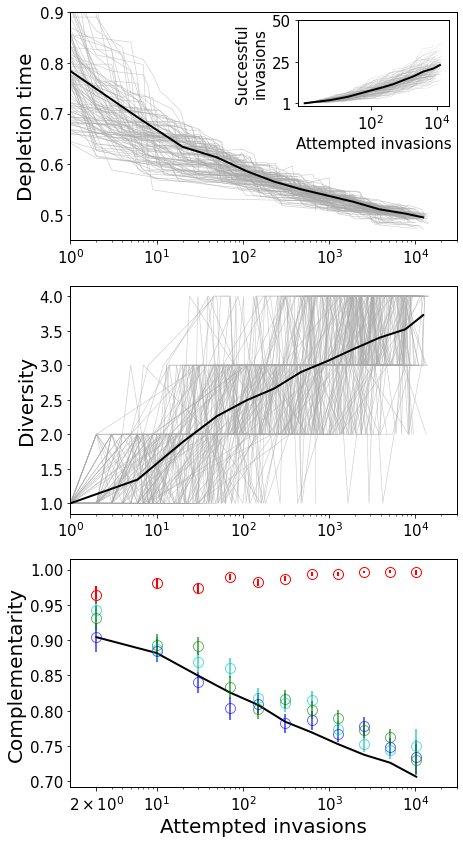

In [30]:
Nr = 4
Size = int(20 * factorial(6) / factorial(Nr))
preference_list = list(itertools.permutations(range(Nr), Nr))

def slotsEvaluation(slotcuts, axis, xs, func, spaghettis = True, errorbar = True, align = 'center', **kwargs_of_func): # given the data and the slots, return the spaghetti plot and the errorbar plot created by x-slots.
    global kwargs_of_spaghetti
    global kwargs_of_errorbar
    # generate the ycoordinates and do the spaghetti plots
    plt.sca(axis)
    ys = [func(xcoords_idx, xcoords, **kwargs_of_func) for xcoords_idx, xcoords in enumerate(xs)]
#     for idx, i in enumerate(ys):
#         if(i[0]> 1):
#             print('haha')
#             print(ys[idx], xs[idx])
    # the function "func" takes in a list of xcoords and other info and returns a list of ycoords. 
    if spaghettis == True:
        for idx in range(len(xs)):
            plt.plot(xs[idx], ys[idx], **kwargs_of_spaghetti)
    # get the stats and do a average +- SEM
    ycoordInSlots = []
    for slotidx, slotbegin in enumerate(slotcuts[:-1]):
        ycoordInSlots.append([])
        slotend = slotcuts[slotidx + 1]
        for xcoords_idx, xcoords in enumerate(xs):
            for idx, i in enumerate(xcoords):
                if(slotbegin <= i < slotend):
                    ycoordInSlots[-1].append(ys[xcoords_idx][idx])
    thickMeans = [np.mean(i) for i in ycoordInSlots]
    thickSEMs = [np.std(i)/sqrt(len(i)) for i in ycoordInSlots]
    if(align == 'center'):
        if errorbar == True:
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([(slotcuts[i] + slotcuts[i+1]) / 2 for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'leftedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    elif(align == 'rightedge'):
        if errorbar == True:
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = thickSEMs, **kwargs_of_errorbar)
        else: 
            plt.errorbar([slotcuts[i+1] for i in range(len(slotcuts) - 1)], thickMeans, yerr = None, **kwargs_of_errorbar) 
    return ys

fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=0.3))
gs = gridspec.GridSpec(3, 1)
#gs.update(hspace=0.1) # set the 2 subplots very close
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[2, 0])

# first create the global slots for all the time series data
d = 2
gap = 5
summed = 0
slots = []
thrs = [2]
while(summed < max([i[-2] for i in invasionOrdersTime[Nr-7]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = [0] + thrs[:-1]
thrs.append(14400)
#thrs.append(max([i[-2] for i in invasionOrdersTime[-1]])) 
xs = []
for outputidx, output6 in enumerate(allOutputs[Nr-7]):
    xs.append([i + 1 for i in invasionOrdersTime[Nr-7][outputidx][:-1]])
    
print(thrs)

# the efficiencies
def efficiencies(xcoords_idx, xcoords, outputsDataset):
    detailsData = outputsDataset[xcoords_idx]['details']
    return [sum(i) for i in detailsData[3]][:-1]
    
kwargs_of_spaghetti = {'color': '#A9A9A9', 'alpha': 0.6, 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax1, xs, efficiencies, spaghettis = True, errorbar = False, outputsDataset = allOutputs[Nr-7])
ax1.set_ylabel("Depletion time", fontsize = 20) 
ax1.set_xscale('log')
ax1.set_ylim([0.45, 0.9])
ax1.set_xlim([1, 3e4])
#ax1.set_xticklabels([])

# the attempted vs. successful invasions
def successfulInvasions(xcoords_idx, xcoords, outputTimeDataset):
    return range(1, 1+len(outputTimeDataset[xcoords_idx]))[:-1]

axins1 = inset_axes(ax1, width=2.1, height=1.2)
kwargs_of_spaghetti = {'color': '#A9A9A9', 'alpha': 0.6, 'linewidth': 0.3}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, axins1, xs, successfulInvasions, spaghettis = True, errorbar = False, outputTimeDataset = invasionOrdersTime[Nr-7])
axins1.set_xscale('log')
axins1.set_xticks([1e2, 1e4])
axins1.set_yticks([1, 25, 50])
axins1.tick_params(axis='both', which='major', labelsize=15)
axins1.set_xlabel('Attempted invasions', fontsize = 15)
axins1.set_ylabel('Successful\ninvasions', fontsize = 15)

# the diversities
def diversities(xcoords_idx, xcoords, outputsDataset, Measure, N):
    data = outputsDataset[xcoords_idx]['details'][-2]
    return [Measure(snapshot[-1][:min(N, len(snapshot[-1]))]) for snapshot in data][:-1]

# this is the diversity measured in inverse simpsons index
def simpsonEvenness(L):
    normalizedL  = [i/sum(L) for i in L]
    return 1/(sum([i**2 for i in normalizedL]))
# this is the diversity measured in number of species
def Nspecies(L):
    return len(L)

kwargs_of_spaghetti = {'color': '#A9A9A9', 'alpha': 0.6, 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k'}
slotsEvaluation(thrs, ax2, xs, diversities, spaghettis = True, errorbar = False, outputsDataset = allOutputs[Nr-7], Measure = Nspecies, N=Nr)
ax2.set_xscale('log')
#ax2.set_xticklabels('')
ax2.set_ylabel('Diversity', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlim([1, 3e4])

# axins2 = inset_axes(ax2, width=2.1, height=1.2, loc = 4)
# kwargs_of_spaghetti = {'color': '#A9A9A9', 'alpha': 0.6, 'linewidth': 0.3}
# kwargs_of_errorbar = {'color': 'k'}
# slotsEvaluation(thrs, axins2, xs, diversities, spaghettis = True, errorbar = False, outputsDataset = allOutputs[Nr-7], Measure = simpsonEvenness, N=Nr)
# axins2.set_xscale('log')
# #axins2.set_xticks([1e2, 1e4])
# axins2.set_xticklabels([])
# axins2.set_xlim([1, 3e4])
# #axins1.set_yticks([1, 25, 50])
# axins2.tick_params(axis='both', which='major', labelsize=15)
# #axins2.set_xlabel('Attempted invasions', fontsize = 15)
# axins2.set_ylabel('Effective\ndiversity', fontsize = 15)

# the complementarity
def upgradedUnikTopChoices(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return (len(set(L)) / len(L)) / randomE

def upgradedUnikTopChoicesRaw(L, N):
    return (len(set(L)) / len(L))

def Nullcompl(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return 1 / randomE

def NullCompl(L, N):
    randomE = (1 - (1-1/N)**float(len(L))) * N / len(L)
    return randomE

def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // Size][consumeOrder] for j in i], Nnuts) for i in data[1][-len(xcoords)-1:-1]]

xsCompl = []
for outputidx, output6 in enumerate(allOutputs[Nr-7]):
    start = 0
    for idx, i in enumerate(allOutputs[Nr-7][outputidx]['details'][1]):
        if(len(i) == 2):
            start = idx
            xsCompl.append([i for i in invasionOrdersTime[Nr-7][outputidx][start:-1]])
            break
    if(start == 0): xsCompl.append([])
        
ys = []  
order = 0
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[Nr-7][idx].index(x[0])
        y = allOutputs[Nr-7][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ys.append([upgradedUnikTopChoicesRaw(i, Nr) for i in y])
        #plt.plot(x, y, color= '#A9A9A9', linewidth= 0.6) 
        
ys_1 = []
order = 1
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[Nr-7][idx].index(x[0])
        y = allOutputs[Nr-7][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ys_1.append([upgradedUnikTopChoicesRaw(i, Nr) for i in y])
        
ys_2 = []
order = 2
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[Nr-7][idx].index(x[0])
        y = allOutputs[Nr-7][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ys_2.append([upgradedUnikTopChoicesRaw(i, Nr) for i in y])
        
ys_3 = []
order = 3
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[Nr-7][idx].index(x[0])
        y = allOutputs[Nr-7][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ys_3.append([upgradedUnikTopChoicesRaw(i, Nr) for i in y])
        
ysRnd = []  
order = 0
for idx, x in enumerate(xsCompl):
    if(x != []):
        start = invasionOrdersTime[Nr-7][idx].index(x[0])
        y = allOutputs[Nr-7][idx]['details'][1][start:-1]
        y = [[preference_list[j // Size][order] for j in i] for i in y]
        ysRnd.append([NullCompl(i, Nr) for i in y])
        #plt.plot(x, y, color= '#A9A9A9', linewidth= 0.6) 
        
def Partcompl(xcoords_idx, xcoords, listname):
    return listname[xcoords_idx]
        
xsCompl = [[i+1 for i in j] for j in xsCompl]
kwargs_of_spaghetti = {'color': '#A9A9A9', 'alpha': 0.6, 'linewidth': 0.6}
kwargs_of_errorbar = {'color': 'k', "label": 'Without selection'}
slotsEvaluation(thrs, ax3, xsCompl, Partcompl, align = 'leftedge', spaghettis = False, errorbar = False, listname = ysRnd)
kwargs_of_errorbar = {'color': 'r', "label": 'Top choice', 'linestyle': 'none', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
slotsEvaluation(thrs, ax3, xsCompl, Partcompl, align = 'leftedge', spaghettis = False, errorbar = True, listname = ys)
kwargs_of_errorbar = {'color': 'b', 'alpha':0.6, "label": 'Second choice','linestyle': 'none', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
slotsEvaluation(thrs, ax3, xsCompl, Partcompl, align = 'leftedge', spaghettis = False, errorbar = True, listname = ys_1)
kwargs_of_errorbar = {'color': 'c', 'alpha':0.6, "label": 'Third choice','linestyle': 'none', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
slotsEvaluation(thrs, ax3, xsCompl, Partcompl, align = 'leftedge', spaghettis = False, errorbar = True, listname = ys_2)
kwargs_of_errorbar = {'color': 'g', 'alpha':0.6, "label": 'Fourth choice','linestyle': 'none', 'marker': 'o', 'markersize': 10,  'mfc': 'none'}
slotsEvaluation(thrs, ax3, xsCompl, Partcompl, align = 'leftedge', spaghettis = False, errorbar = True, listname = ys_3)
ax3.set_xscale('log')
ax3.set_xlim(1, 3e4)
ax3.set_xticks([2, 10, 100, 1000, 10000])
ax3.set_xticklabels(['$2\\times 10^0$', '$10^1$','$10^2$','$10^3$','$10^4$'])
ax3.set_xlabel('Attempted invasions', fontsize =20)
ax3.set_ylabel('Complementarity', fontsize = 20)
#ax3.legend()

plt.savefig('figsversion1/fig2-1.pdf')

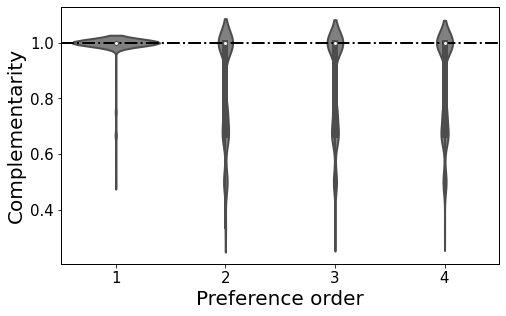

In [148]:
def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // Size][consumeOrder] for j in i], Nnuts) for i in data[1][:-1]]

from numpy import mean
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
omniCompl = [sum([compls(xcoords_idx, [], allOutputs[Nr-7], consumeOrder = i, complMeasure = upgradedUnikTopChoicesRaw, Nnuts = Nr) for xcoords_idx in range(len(allOutputs[Nr-7]))], []) for i in range(Nr)]
sns.violinplot(x = sum([[i+1 for j in omniCompl[i]] for i in range(len(omniCompl))], []), y = sum(omniCompl, []), color = '#808080')
plt.axhline(1, linestyle = '-.', color = 'k')
plt.xlabel('Preference order', fontsize=20)
plt.ylabel('Complementarity', fontsize=20)
plt.savefig('figsversion1/fig2-2.pdf')

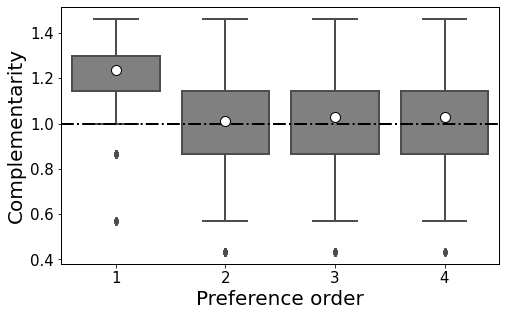

In [160]:
def compls(xcoords_idx, xcoords, outputsDataset, consumeOrder, complMeasure, Nnuts):
    data = outputsDataset[xcoords_idx]['details']
    return [complMeasure([preference_list[j // Size][consumeOrder] for j in i], Nnuts) for i in data[1][:-1]]

from numpy import mean
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
omniCompl = [sum([compls(xcoords_idx, [], allOutputs[Nr-7], consumeOrder = i, complMeasure = upgradedUnikTopChoices, Nnuts = Nr) for xcoords_idx in range(len(allOutputs[Nr-7]))], []) for i in range(Nr)]
sns.boxplot(x = sum([[i+1 for j in omniCompl[i]] for i in range(len(omniCompl))], []), y = sum(omniCompl, []), 
            color = '#808080', medianprops = dict(linestyle='none'), showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.axhline(1, linestyle = '-.', color = 'k')
plt.xlabel('Preference order', fontsize=20)
plt.ylabel('Complementarity', fontsize=20)
plt.savefig('figsversion1/fig2-2.pdf')

In [ ]:
# set the canvas
fig = plt.figure(constrained_layout=True, figsize = set_size(WIDTH, fraction=1))
gs = gridspec.GridSpec(1, 1)
gs.update(hspace=0.1)
ax = fig.add_subplot(gs[0, 0]) 

#import the dataset
import os
allInputs = []
allOutputs = []
for Nr in [6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 401):
        outputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\outputs_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        inputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\input_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(2+Nr)*Size)
                n_reentrance[-1] += 1       
                
# set the logscale gap
d = 1.5
gap = 10
summed = 0
slots = []
thrs = [1, 2, 3, 4, 5]
while(summed < max([i[-2] for i in invasionOrdersTime[-1]])):
    gap = gap*d
    summed += gap
    thrs.append(summed)
    slots.append([])
thrs = thrs[:-1]
#thrs.append(max([i[-2] for i in invasionOrdersTime[-1]]))
thrs = [0] +thrs

xs = []
for outputidx, output6 in enumerate(allOutputs[-1]):
    xs.append(invasionOrdersTime[-1][outputidx][:-1])
    
def fracAnomaly(xcoords_idx, xcoords, outputsDataset, inputsDataset):
    survivors = outputsDataset[xcoords_idx]['details'][1][:-1]
    survivorSnapshot = survivors[-7]
    return [sum([isFreak(inputsDataset[xcoords_idx]['G'], bug) for bug in survivorSnapshot]) / len(survivorSnapshot) for survivorSnapshot in survivors]

kwargs_of_errorbar = {'marker': 'o', 'markersize': 10, 'ls': 'none', 'mfc': 'none', 'color': 'k'}
slotsEvaluation(thrs, ax, xs, fracAnomaly, spaghettis = False, errorbar = True, align = 'rightedge', outputsDataset = allOutputs[-1], inputsDataset = allInputs[-1])
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Attempted invasions')
ax.set_ylabel('Frequency of anomalous bugs')
ax.axhline(5/6, color = 'k', alpha = .5)
ax.axhline(0, color = 'k', alpha = .5)
plt.savefig('figsversion1/fig2-3.pdf')

# ax3.set_xlabel('Attempted invasions', fontsize = 15)
# ax3.set_ylabel('Complementarity', fontsize = 15)
# ax3.tick_params(axis='both', which='major', labelsize=15)
# ax3.set_xscale('log')
# ax3.set_xlim([1, 3e4])